In [76]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data
import seaborn as sns
import matplotlib.dates as mdates

In [77]:
#creating a start date and end date
start = '2010-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

#creating the dataframe
df= data.DataReader('AAPL', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.515211
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.526475
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.422665
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.410791
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.453411
                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-12-02  148.000000  145.649994  145.960007  147.809998  65421400.0   
2022-12-05  150.919998  145.770004  147.770004  146.630005  68826400.0   
2022-12-06  147.300003  141.919998  147.070007  142.910004  64727200.0   
2022-12-07  143.369995  140.000000  142.190002  140.940002  69721100.0   
2022-12-08  143.520004  141.100

(3257, 6)

In [78]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
#df = df.reset_index()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515211
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526475
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453411


In [79]:
#df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515211
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526475
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453411


In [80]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
df.info()
print(df.shape)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3257 entries, 2010-01-04 to 2022-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3257 non-null   float64
 1   Low        3257 non-null   float64
 2   Open       3257 non-null   float64
 3   Close      3257 non-null   float64
 4   Volume     3257 non-null   float64
 5   Adj Close  3257 non-null   float64
dtypes: float64(6)
memory usage: 178.1 KB
(3257, 6)


Exploring the Data

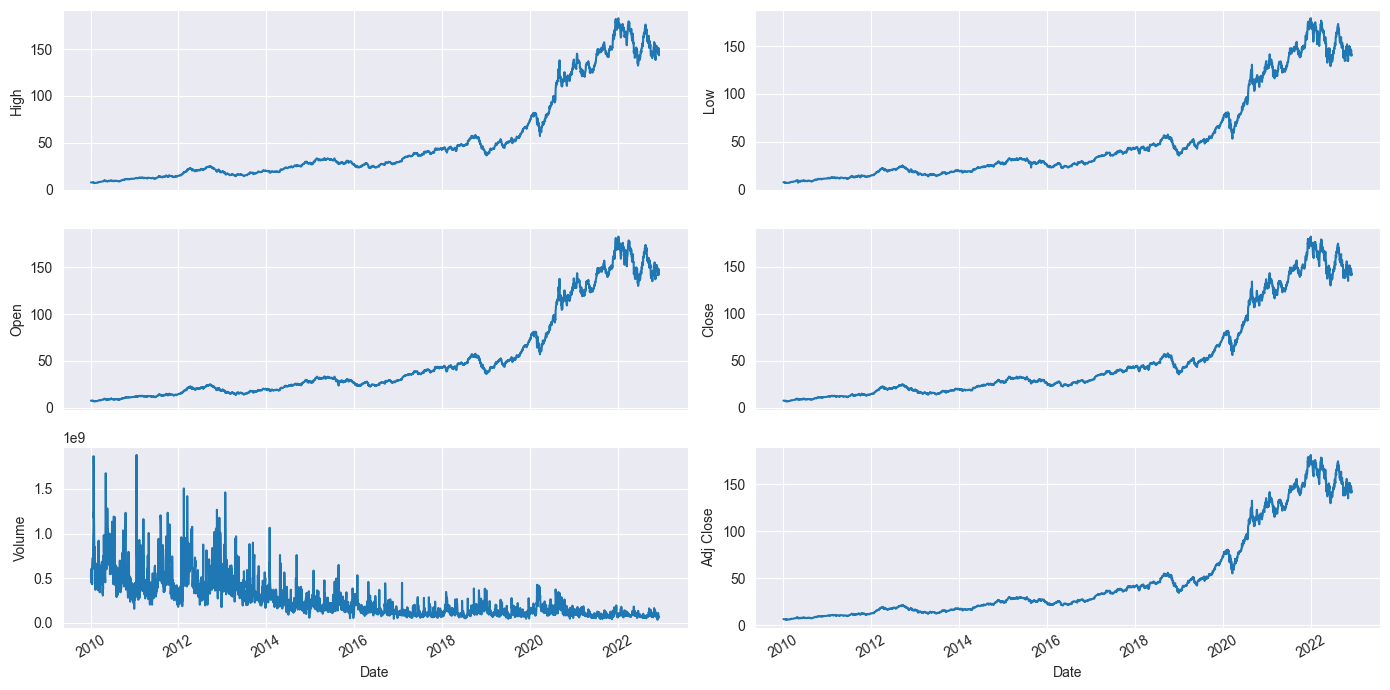

In [81]:
#Plot line charts
df_plot = df.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        #ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


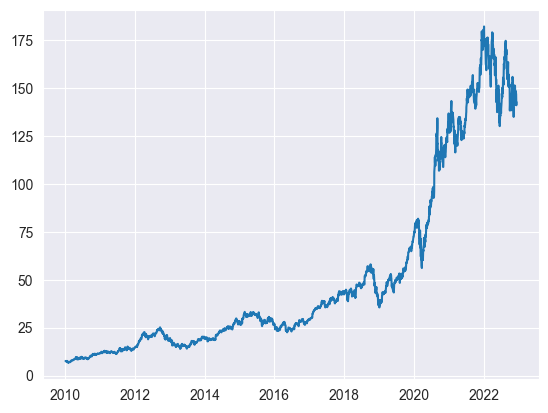

In [82]:
#since close column is our target variable, plot the close column
plt.plot(df.Close)

In [83]:
#splitting the data into training and testing
train_header = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
target_header = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(df.shape)
print(train_header.shape)
print(target_header.shape)

(3257, 6)
(2279, 1)
(978, 1)


In [84]:
#Scaling the stock data
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(train_header)

train_header_array


#print("\n Scaled data: \n ", train_header_array)

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.63227082],
       [0.61506938],
       [0.61809915]])

In [85]:
#creating the number of steps(x) so as to predict the next result(y)
#the closing price of the particular day would depend on the previous days
x_train = []
y_train = []

for i in range(100, train_header_array.shape[0]):
    x_train.append(train_header_array[i-100: i])
    y_train.append(train_header_array[i, 0]) #because we are considering only one column
x_train, y_train = np.array(x_train), np.array(y_train)

In [86]:
#ml model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import tensorflow

model = Sequential()
model.add(LSTM(units =50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units =60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))
model.add(LSTM(units =80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))
model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))
#
model.add(Dense(units = 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

Epoch 1/50
69/69 [==============================] - 27s 168ms/step - loss: 0.0321 - mae: 0.1209
Epoch 2/50
69/69 [==============================] - 12s 168ms/step - loss: 0.0068 - mae: 0.0586
Epoch 3/50
69/69 [==============================] - 12s 171ms/step - loss: 0.0054 - mae: 0.0521
Epoch 4/50
69/69 [==============================] - 11s 165ms/step - loss: 0.0053 - mae: 0.0509
Epoch 5/50
69/69 [==============================] - 12s 174ms/step - loss: 0.0048 - mae: 0.0488
Epoch 6/50
69/69 [==============================] - 14s 200ms/step - loss: 0.0049 - mae: 0.0496
Epoch 7/50
69/69 [==============================] - 12s 169ms/step - loss: 0.0050 - mae: 0.0499
Epoch 8/50
69/69 [==============================] - 11s 166ms/step - loss: 0.0044 - mae: 0.0469
Epoch 9/50
69/69 [==============================] - 12s 171ms/step - loss: 0.0041 - mae: 0.0443
Epoch 10/50
69/69 [==============================] - 12s 169ms/step - loss: 0.0036 - mae: 0.0417
Epoch 11/50
69/69 [====================

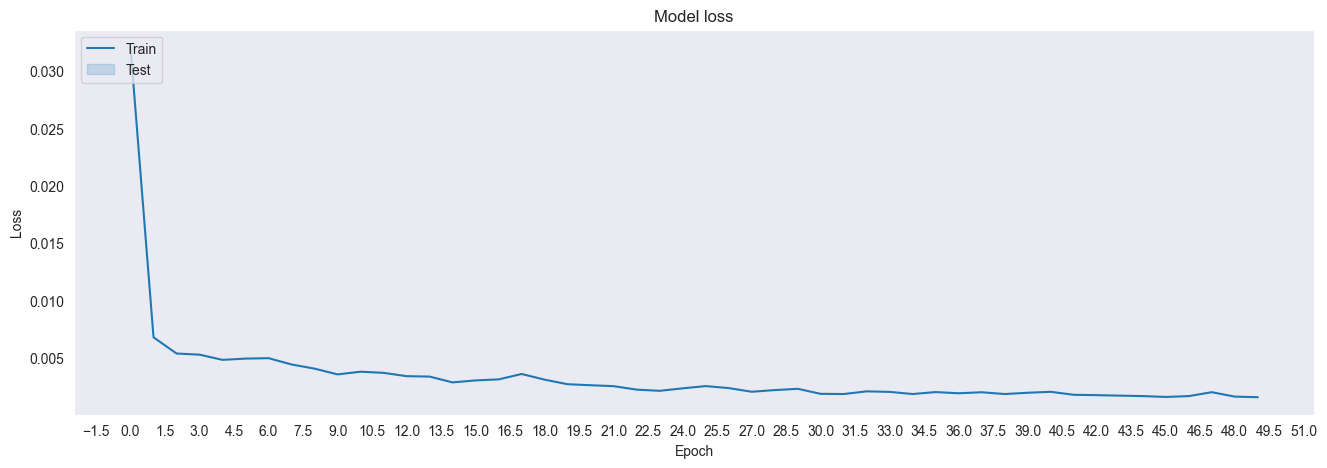

In [87]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mae'])
epochs = 50
history=model.fit(x_train, y_train, epochs=epochs)


# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [88]:
#save the model
model.save('venv\lstm_model.h5')

In [89]:
#to predict the values for testing data, the previous 100 days is needed
prev_100_days = train_header.tail(100)
final_df = prev_100_days.append(target_header, ignore_index=True)
final_df.head()

C:\Users\dagbo\AppData\Local\Temp\ipykernel_11284\1137634701.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = prev_100_days.append(target_header, ignore_index=True)


,Close
0,55.744999
1,56.257500
2,56.907501
3,57.090000
4,56.717499


In [90]:
scaled_data = scaler.fit_transform(final_df)
scaled_data
scaled_data.shape

(1078, 1)

In [91]:
x_test = []
y_test = []

for i in range(100, scaled_data.shape[0]):
    x_test.append(scaled_data[i-100: i])
    y_test.append(scaled_data[i, 0])
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(978, 100, 1)
(978,)


In [92]:
#making predictions
y_pred = model.predict(x_test)
y_pred.shape

31/31 [==============================] - 6s 63ms/step


(978, 1)

Evaluating model performances

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Unscale the predicted values
y_pred_scale = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_scale)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_scale)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_scale)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Median Absolute Error (MAE): 6.22
Mean Absolute Percentage Error (MAPE): 8.21 %
Median Absolute Percentage Error (MDAPE): 4.2 %


In [94]:
print(y_test)
print('----------------predictions--------------')
print(y_pred)


[0.01793974 0.02657676 0.02408467 0.02131943 0.03936161 0.04139285
 0.04152941 0.04960314 0.05460441 0.05470684 0.049074   0.04816933
 0.04649653 0.04898865 0.04777672 0.04883503 0.04818639 0.04905691
 0.05093454 0.04927882 0.05253905 0.05468976 0.05486046 0.05578219
 0.05284628 0.05595289 0.05745499 0.05690876 0.05518478 0.05173679
 0.05243663 0.06266108 0.06609201 0.06745755 0.07090551 0.07498506
 0.07822822 0.0756849  0.07846719 0.09029614 0.08340019 0.07945721
 0.07612869 0.07899633 0.07942306 0.08152257 0.08372451 0.08846975
 0.09073996 0.09132031 0.09355637 0.09884784 0.09782367 0.09973542
 0.09688486 0.09674831 0.0973628  0.09739694 0.10401981 0.10526585
 0.10640949 0.1114449  0.1108987  0.10768968 0.1060169  0.10654605
 0.09982077 0.11663396 0.11429546 0.11873346 0.11315182 0.10355893
 0.1036272  0.09990612 0.0938636  0.0743023  0.07932065 0.08317828
 0.08174448 0.079901   0.06981308 0.0758044  0.06928394 0.06395836
 0.06278058 0.06151744 0.06006658 0.06163694 0.05612359 0.0531

In [95]:
scaler.scale_


array([0.00682769])

In [96]:
factorized_scale = 1/0.020995
y_pred = y_pred*factorized_scale
y_test = y_test * factorized_scale



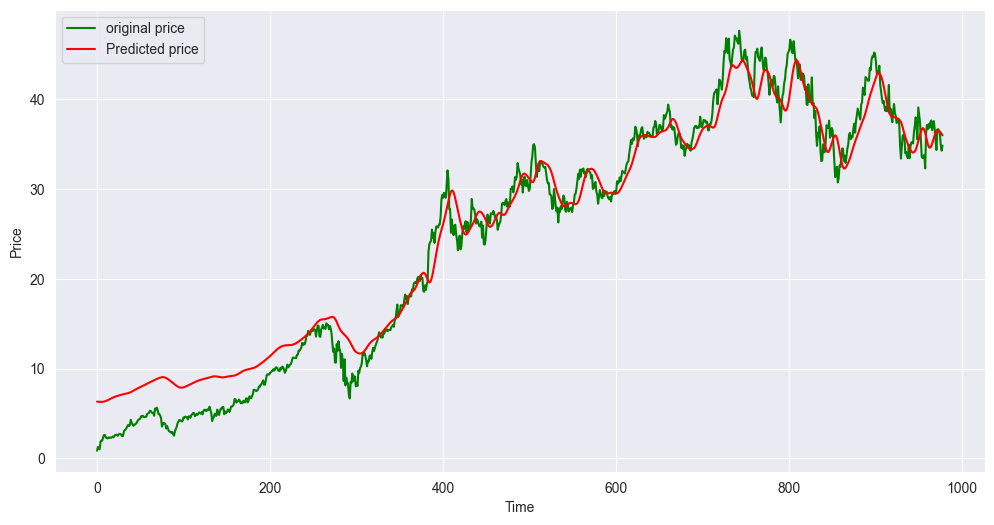

In [97]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label = "original price")
plt.plot(y_pred, 'r', label = "Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Predicting Next day Price